# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [21]:
!git clone https://github.com/meherkalsi13-png/wrangling_assignment.git
%cd wrangling_assignment

import pandas as pd
import numpy as np
#----------------------------------------------------------------------------------------------------------------
#Numerical Value
airbnb = pd.read_csv("./data/airbnb_hw.csv")
airbnb.head()
#explaining the choices I made: took out the "$" and "," in order to convert Price column variables into floats. Used astype to convert Price into floats.
#How many missing values do I end up with? 0. Once you go over 999, numbers start to have commas which will become NaN after conversion -> leads to missing values.
airbnb["price_clean"] = (
    airbnb["Price"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)
missing_count = airbnb['price_clean'].isna().sum()
print("Missing values after cleaning:", missing_count)
#----------------------------------------------------------------------------------------------------------------
#Categorial Variable
police = pd.read_csv("./data/mn_police_use_of_force.csv")
police.head()
police['subject_injury_clean'] = police['subject_injury'].replace({
    'yes': 'Yes',
    'no': 'No'
})
#find missing values
proportion_missing = police['subject_injury_clean'].isna().mean()
print("Proportion missing:", proportion_missing)
#What proportion of the values are missing? Is this a concern?: 76% of data is missing, which is a concern because that constitutes a majority of the data and can lead to biased analysis.
cross_tab = pd.crosstab(police['subject_injury_clean'], police['force_type'], margins=True)
print(cross_tab)
#Are there any patterns regarding when the data are missing? It is not evenly distributed. There are more missing values in force types that have fewere incidents recorded such as baton, firearm, etc.
#----------------------------------------------------------------------------------------------------------------
#Dummy Variable
justice = pd.read_parquet("./data/justice_data.parquet")
justice.head()
justice['released_clean'] = justice['WhetherDefendantWasReleasedPretrial'].replace({
    None: np.nan,
    "": np.nan
})
#dropna = False makes sure to include Na in the count and check that they have been replaced
justice['released_clean'].value_counts(dropna=False)

justice['sentence_clean'] = pd.to_numeric(
    justice['ImposedSentenceAllChargeInContactEvent'], errors='coerce'
)
#The ImposedSentenceAllChargeInContactEvent column was converted to numeric and non-numberics/blanks were replaced with NaN. Pd to Numeric command used because some cells were words and texts, and not numbers. Many missing values correspond to defendants who were not sentenced, received probation, or had other sentence types which we could see from the SentenceTypeAllChargesAtConvictionInContactEvent column.
#-----------------------------------------------------------------------------------------------------------------

Cloning into 'wrangling_assignment'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 8 (from 1)
Receiving objects: 100% (11/11), 5.83 MiB | 8.75 MiB/s, done.
/content/wrangling_assignment/wrangling_assignment/wrangling_assignment/wrangling_assignment/wrangling_assignment/wrangling_assignment/wrangling_assignment/wrangling_assignment/wrangling_assignment/wrangling_assignment/wrangling_assignment/wrangling_assignment/wrangling_assignment/wrangling_assignment/wrangling_assignment/wrangling_assignment
Missing values after cleaning: 0
Proportion missing: 0.7619342359767892
force_type            Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_clean                                                    
No                        0          1093                131        2   
Yes                       2          1286                 41  

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Year range: 0.0 to 2026.0
Number of attacks since 1940: 5507


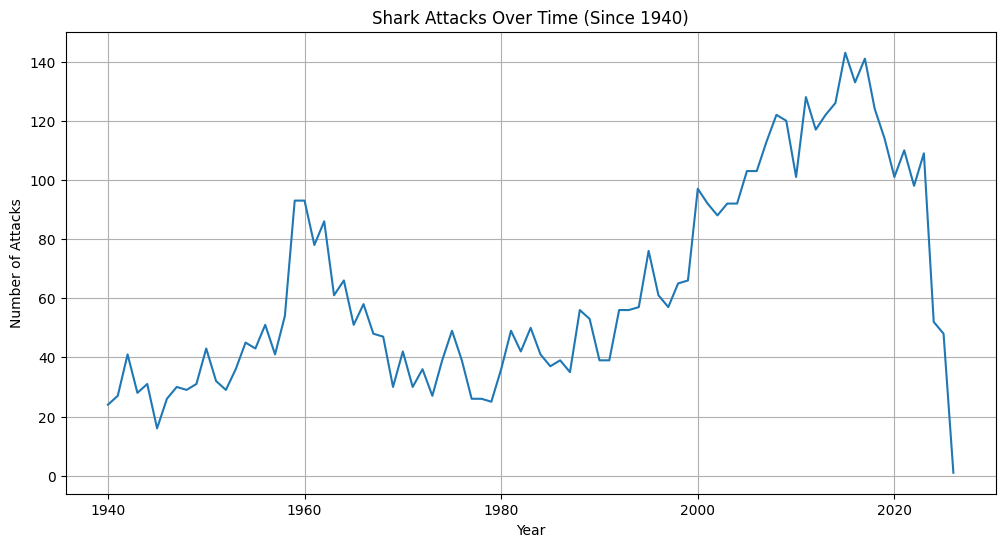

Average attacks per year (before 1980): 42.7
Average attacks per year (2000+): 103.3

Age statistics after cleaning:
count    3600.000000
mean       28.597500
std        14.795238
min         1.000000
25%        17.000000
50%        25.000000
75%        37.000000
max        87.000000
Name: Age_Clean, dtype: float64


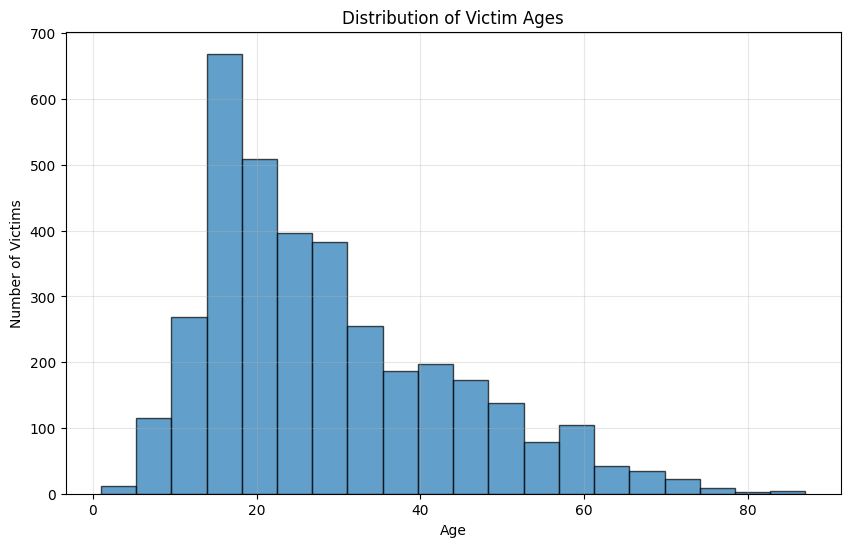


Cleaned gender values:
Sex_Clean
M        4333
F         720
LLI         1
M X 2       1
Name: count, dtype: int64

Proportion of victims who are male: 85.72%

Cleaned Type values:
Type_Clean
Provoked    4618
Unknown      889
Name: count, dtype: int64

Proportion of attacks that are unprovoked: 0.00%
['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ', 'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22', 'Year_clean', 'Age_str', 'Age_Clean', 'Sex_Clean', 'Type_Clean']

Cleaned Fatal values:
Fatal_Clean
N          4267
Y           825
Unknown     415
Name: count, dtype: int64
1. Attack type by gender:
Sex_Clean     F  LLI     M  M X 2   All
Type_Clean                             
Provoked    641    1  3791      0  4433
Unknown      79    0   542      1   622
All         720    1  4333      1  5055

2. Fatality by attack type:
Fatal_Clean  

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Step 1: Open the shark attack file using Pandas. It is probably not a csv file, so read_csv won't work.
shark = pd.read_excel("/content/GSAF5.xls")
shark.head()

#Step 2: Drop Columns that do not contain data
shark = shark.dropna(axis=1, how='all')

#Step 3: Clean year variable. Filter rows to focus on attacks since 1940.
# Convert to numeric; invalid values become NaN
shark['Year_clean'] = pd.to_numeric(shark['Year'], errors='coerce')
# Check min, max, and general range
print(f"Year range: {shark['Year_clean'].min()} to {shark['Year_clean'].max()}")
# Filter to attacks since 1940
filtered_attack = shark[shark['Year'] >= 1940].copy()
print(f"Number of attacks since 1940: {len(filtered_attack)}")
#Describe range of values you see: Range of values are from 0 to 2026
attacks_by_year = filtered_attack.groupby('Year').size()

# Create a simple plot
plt.figure(figsize=(12, 6))
plt.plot(attacks_by_year.index, attacks_by_year.values)
plt.title('Shark Attacks Over Time (Since 1940)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

# Calculate trend (simple approach)
recent_years = attacks_by_year[attacks_by_year.index >= 2000].mean()
earlier_years = attacks_by_year[attacks_by_year.index < 1980].mean()
print(f"Average attacks per year (before 1980): {earlier_years:.1f}")
print(f"Average attacks per year (2000+): {recent_years:.1f}")

#Are attacks increasing, decreasing, or remaining constant over time? Attacks are mostly increasing over time, although there is a sharp drop off after 2020

#Step 4: Clean Age variable; make histogram of ages of victims
filtered_attack['Age_str'] = filtered_attack['Age'].astype(str)

filtered_attack['Age_Clean'] = pd.to_numeric(filtered_attack['Age_str'], errors='coerce')

print(f"\nAge statistics after cleaning:")
print(filtered_attack['Age_Clean'].describe())

# Make histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_attack['Age_Clean'].dropna(), bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.grid(True, alpha=0.3)
plt.show()

#Step 5: What proportion of victims are male?
filtered_attack['Sex_Clean'] = filtered_attack['Sex'].str.strip().str.upper()

print("\nCleaned gender values:")
gender_counts = filtered_attack['Sex_Clean'].value_counts()
print(gender_counts)

# Calculate proportion of males
total_with_gender = gender_counts.sum()
males = gender_counts.get('M', 0)
proportion_male = males / total_with_gender

print(f"\nProportion of victims who are male: {proportion_male:.2%}")
#Step 6: Clean Type variable
filtered_attack['Type_Clean'] = 'Unknown'
# Use .str.contains() to check for keywords (case insensitive)
unprovoked_mask = filtered_attack['Type'].str.contains('Unprovoked', case=False, na=False)
provoked_mask = filtered_attack['Type'].str.contains('Provoked', case=False, na=False)

# Assign the values
filtered_attack.loc[unprovoked_mask, 'Type_Clean'] = 'Unprovoked'
filtered_attack.loc[provoked_mask, 'Type_Clean'] = 'Provoked'

print("\nCleaned Type values:")
type_counts = filtered_attack['Type_Clean'].value_counts()
print(type_counts)

# Calculate proportion unprovoked

total_attacks = type_counts.sum()
unprovoked_attacks = type_counts.get('Unprovoked', 0)
proportion_unprovoked = unprovoked_attacks / total_attacks

print(f"\nProportion of attacks that are unprovoked: {proportion_unprovoked:.2%}")

#What proportion of attacks are unprovoked?
#Step 7: Clean Fatal Y/N variable
print(filtered_attack.columns.tolist())

filtered_attack['Fatal_Clean'] = 'Unknown'  # Start with all Unknown

# Create masks for Y and N values
y_mask = filtered_attack['Fatal Y/N'].str.contains('Y', case=False, na=False)
n_mask = filtered_attack['Fatal Y/N'].str.contains('N', case=False, na=False)

# Assign values
filtered_attack.loc[y_mask, 'Fatal_Clean'] = 'Y'
filtered_attack.loc[n_mask, 'Fatal_Clean'] = 'N'

print("\nCleaned Fatal values:")
print(filtered_attack['Fatal_Clean'].value_counts())
#Step 8:
print("1. Attack type by gender:")
table1 = pd.crosstab(filtered_attack['Type_Clean'], filtered_attack['Sex_Clean'], margins=True)
print(table1)

print("\n2. Fatality by attack type:")
table2 = pd.crosstab(filtered_attack['Type_Clean'], filtered_attack['Fatal_Clean'], margins=True)
print(table2)

print("\n3. Fatality by gender:")
table3 = pd.crosstab(filtered_attack['Sex_Clean'], filtered_attack['Fatal_Clean'], margins=True)
print(table3)
#Are sharks more likely to launch unprovoked attacks on men or women? Sharks more likely to launch unprovoked attacks on women.
#Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Attack more likely to be fatal when provoked.
#Is it more or less likely to be fatal when the victim is male or female? Males have slightly higher fatality proportion than females.
# How do you feel about sharks? I like them. I think they're not as deadly as media makes them out ot be.

#Step 9: Proportion of attacks by white sharks? You can use str.split()
shark['Species_list'] = shark['Species '].str.split()

# Count rows where 'White' appears (White Shark)
white_shark_count = shark['Species_list'].apply(lambda x: 'White' in x if isinstance(x, list) else False).sum()

# Proportion
print("Proportion of attacks by white sharks:", white_shark_count / len(shark))